In [91]:
# Loading our trained model using keras inbuilt functions
from tensorflow import keras
Model = keras.models.load_model('ASL_Model')

# checking the summary once to ensure that our model has loaded properly
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 50)      

Expected Output: G Actual Output: G


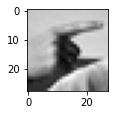

Expected Output: F Actual Output: F


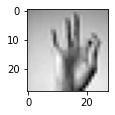

Expected Output: I Actual Output: I


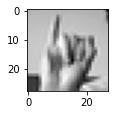

Expected Output: D Actual Output: D


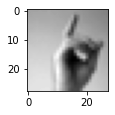

Expected Output: N Actual Output: N


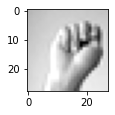

Expected Output: E Actual Output: E


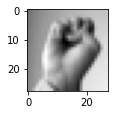

Expected Output: G Actual Output: G


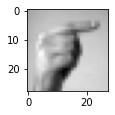

Expected Output: T Actual Output: T


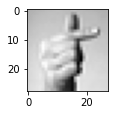

Expected Output: E Actual Output: E


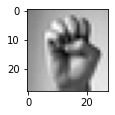

Expected Output: A Actual Output: A


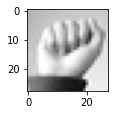

In [92]:
# Now that our model has been successfully loaded

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv('Data_Set/sign_mnist_valid.csv')
test_data = np.array(test, dtype = 'float32')

x_test = test_data[:, 1:]
y_test = test_data[:, 0]

# We must convert the input to same format we used for training
# normalising and reshaping it accordingly
x_test = x_test / 255
x_test = x_test.reshape(-1, 28, 28, 1)

# passing the images one by one to model
for i in range(len(x_test)):
    image = []
    image.append(x_test[i])
    image = np.array(image, dtype = 'float32')

    # we use the .predict() function to receive an array of probabilities from the model
    # then we print the index of whichever label is the highest and compare the output
    prediction = Model.predict(image)
    print("Expected Output:", class_names[int(y_test[i])], "Actual Output:", class_names[int(np.argmax(prediction))])

    # plotting the image for reference
    fig1, ax1 = plt.subplots(figsize = (1.5, 1.5))
    plt.imshow(x_test[i], cmap = 'gray')
    plt.show()
    